2024-07-27 10:57:48.435176: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-27 10:57:48.677747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 10:57:48.677770: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 10:57:48.678977: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-27 10:57:48.789691: I tensorflow/core/platform/cpu_feature_g

Epoch 1/5


2024-07-27 10:57:51.885308: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-27 10:57:51.961891: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ef12a63b800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-27 10:57:51.961909: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-07-27 10:57:51.967446: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-27 10:57:51.983261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-07-27 10:57:52.047724: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.3327 - accuracy: 0.9054 - val_loss: 0.1963 - val_accuracy: 0.9425
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1659 - accuracy: 0.9512 - val_loss: 0.1388 - val_accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1054 - accuracy: 0.9689 - val_loss: 0.0890 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0721 - accuracy: 0.9782 - val_loss: 0.0769 - val_accuracy: 0.9770
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9790
Test accuracy: 0.9789999723434448


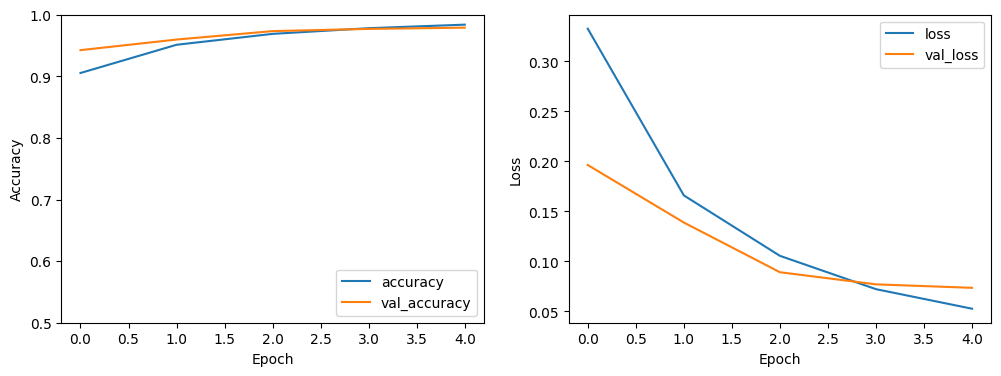

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(784, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3423 - accuracy: 0.8945 - val_loss: 0.1840 - val_accuracy: 0.9407
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1333 - accuracy: 0.9596 - val_loss: 0.1001 - val_accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0866 - accuracy: 0.9729 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 5/5
313/313 [==============================] - 0s 887us/step - loss: 0.0713 - accuracy: 0.9791
Test accuracy: 0.9790999889373779


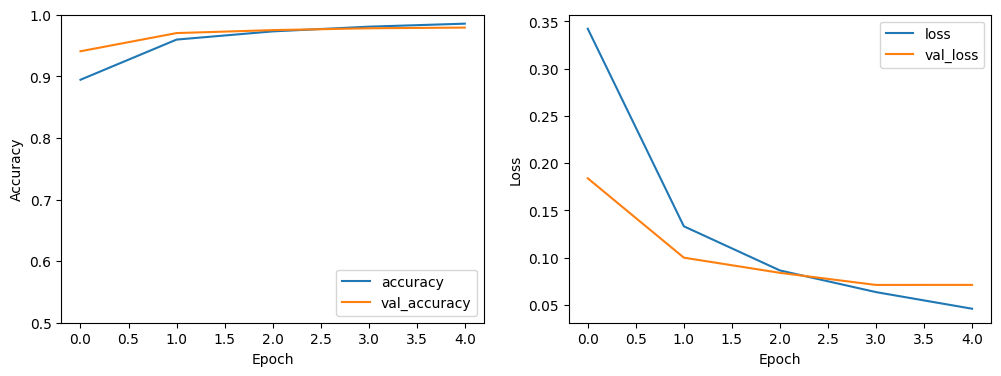

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(784, activation='sigmoid'))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


Epoch 1/5


2024-07-27 11:01:57.925214: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1606 - accuracy: 0.9525 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9825 - val_loss: 0.0500 - val_accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0431 - val_accuracy: 0.9854
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


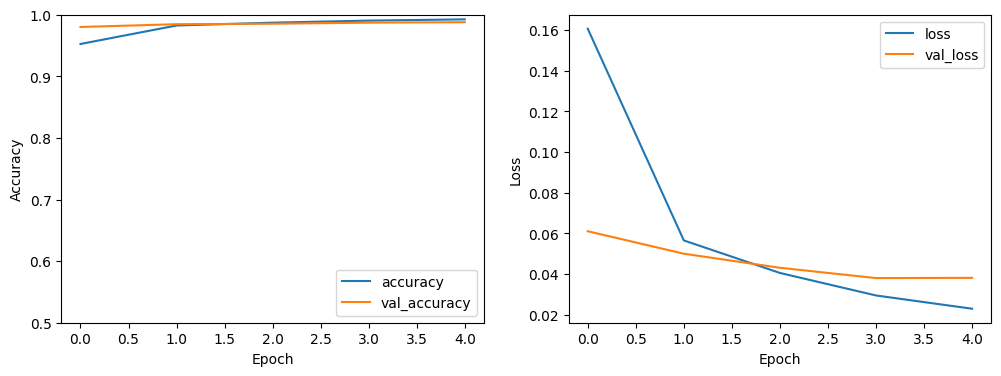

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
model = models.Sequential()
model.add(layers.Conv2D(20, (9,9), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())

model.add(layers.Dense(100, "relu"))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
